In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import warnings
import src.processing as dataset
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import pandas as pd
from scipy.spatial import distance

In [45]:
data = dataset.Data(72, "dataset/configurations/OTTAWA_DMRS_Scenario1.csv")
results = np.zeros((6, 9)).tolist()

coords = []

for k, coord in data.active_dot_coordinates.iterrows():
    coords.append((coord['x'], coord['y'], coord['z']))


c:\Users\pmaty\anaconda3\lib\site-packages\scipy\io\matlab\mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
c:\Users\pmaty\anaconda3\lib\site-packages\scipy\io\matlab\mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


Dropped 10 points in measurement 72
Distance between the estimated and real position is 1.21 meters
Statistics of measurement 72:
29 out of 90 estimations is within 1m (32.22 %)
90 out of 90 estimations is within 2m (100.0 %)
90 out of 90 estimations is within 5m (100.0 %)
90 out of 90 estimations is within 10m (100.0 %)
Dropped 14 points in measurement 73
Distance between the estimated and real position is 3.70 meters
Statistics of measurement 73:
0 out of 86 estimations is within 1m (0.0 %)
0 out of 86 estimations is within 2m (0.0 %)
86 out of 86 estimations is within 5m (100.0 %)
86 out of 86 estimations is within 10m (100.0 %)
Dropped 26 points in measurement 74
Distance between the estimated and real position is 2.71 meters
Statistics of measurement 74:
7 out of 74 estimations is within 1m (9.46 %)
21 out of 74 estimations is within 2m (28.38 %)
72 out of 74 estimations is within 5m (97.3 %)
74 out of 74 estimations is within 10m (100.0 %)
Dropped 3 points in measurement 75
Dista

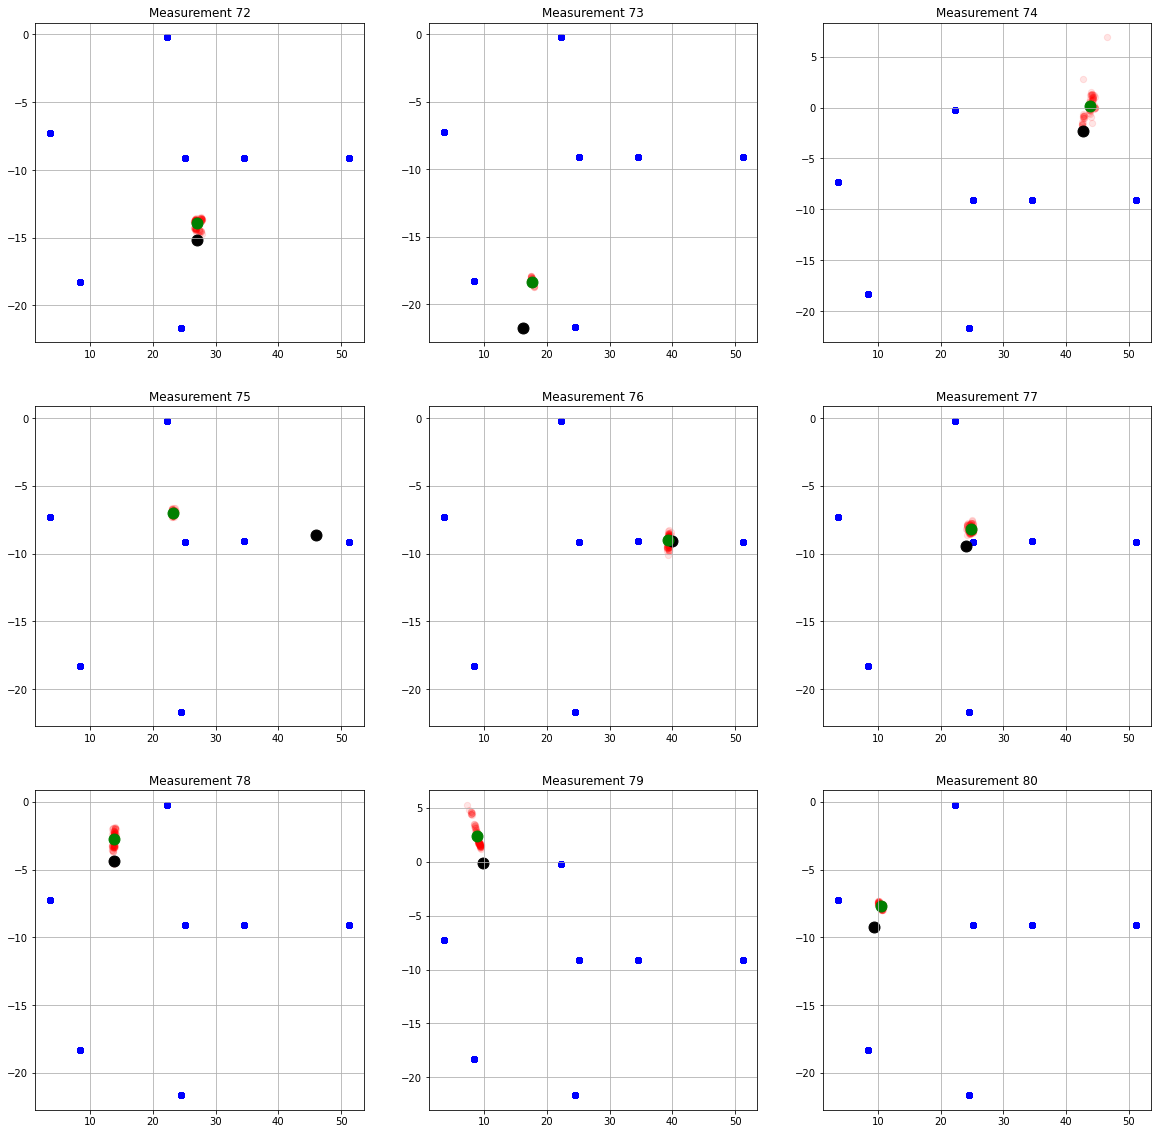

In [122]:
warnings.filterwarnings("ignore", category=UserWarning)
# idx=3

plt.subplots(3,3, figsize=(20,20))
for i in range(72, 81, 1):
    plt.subplot(3,3,i-71)
    testdata = dataset.Data(i, "dataset/configurations/OTTAWA_DMRS_Scenario1.csv")
    ue_pos = testdata.configuration['x'], testdata.configuration['y']
    loc = testdata.tdoa_localization(upsample_ratio=8)
    plt.xlim = [0,60]
    plt.ylim = [-30,10]
    plt.grid(True)
    plt.title("Measurement {}".format(i))
    plt.scatter(testdata.configuration['x'], testdata.configuration['y'], c='black', s=120)
    plt.scatter(tdoa.estimate_mean_position(loc)[0], tdoa.estimate_mean_position(loc)[1], c='green', s=120)
    estimated_distance = distance.euclidean((testdata.configuration['x'], testdata.configuration['y']), (tdoa.estimate_mean_position(loc)[0], tdoa.estimate_mean_position(loc)[1]))
    print(f"Distance between the estimated and real position is {estimated_distance:.2f} meters")
    range1 = 0
    range2 = 0
    range5 = 0
    range10 = 0
    range_else = 0
    for l in loc:
        if distance.euclidean(l[0:2], ue_pos[0:2]) < 1:
            range1+=1
        if distance.euclidean(l[0:2], ue_pos[0:2]) < 2:
            range2+=1
        if distance.euclidean(l[0:2], ue_pos[0:2]) < 5:
            range5+=1
        if distance.euclidean(l[0:2], ue_pos[0:2]) < 10:
            range10+=1
        else:
            range_else+=1
    # results[idx][i-72] = estimated_distance
    print('Statistics of measurement {}:'.format(i))
    print(str(range1) + ' out of ' + str(len(loc)) + ' estimations is within 1m (' + str(round(range1/len(loc)*100, 2))+ ' %)')
    print(str(range2) + ' out of ' + str(len(loc)) + ' estimations is within 2m (' + str(round(range2/len(loc)*100, 2))+ ' %)')
    print(str(range5) + ' out of ' + str(len(loc)) + ' estimations is within 5m (' + str(round(range5/len(loc)*100, 2))+ ' %)')
    print(str(range10) + ' out of ' + str(len(loc)) + ' estimations is within 10m (' + str(round(range10/len(loc)*100, 2))+ ' %)')

warnings.resetwarnings()

In [119]:
results2 = np.zeros((6,10)).tolist()
names = ['40% peak threshold', '45% peak threshold', '50% peak threshold', '55% peak threshold', "60% peak threshold"]
for k in range(len(names)):
    for j in range(9):
        results2[k+1][j+1] = results[k][j]
        results2[0][j+1] = "Measurement " + str(j+72)
        results2[k+1][0] = names[k]
results2[0][0] = ""
res_df = pd.DataFrame(results2)
res_df

,0,1,2,3,4,5,6,7,8,9
0,,Measurement 72,Measurement 73,Measurement 74,Measurement 75,Measurement 76,Measurement 77,Measurement 78,Measurement 79,Measurement 80
1,40% peak threshold,1.16,3.48,2.99,22.64,0.52,1.71,1.84,3.02,1.83
2,45% peak threshold,1.35,3.24,16.33,22.6,0.38,1.64,1.37,7.04,1.76
3,50% peak threshold,1.48,2.77,16.31,22.48,1.41,1.55,1.0,6.85,1.53
4,55% peak threshold,1.73,2.41,6.17,22.53,3.5,1.5,1.58,5.5,0.34
5,60% peak threshold,2.25,2.04,4.3,22.93,3.66,1.63,2.51,1.41,0.59
